In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)


In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thape\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import re
import string

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:

from wordcloud import WordCloud

In [7]:
Mental_Health_Twitter_data=pd.read_csv('Mental-Health-Twitter.csv')
Mental_Health_Twitter_data.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [8]:
Mental_Health_Twitter_data=Mental_Health_Twitter_data.drop("Unnamed: 0",axis=1)

In [9]:
Mental_Health_Twitter_data.shape

(20000, 10)

In [10]:
Mental_Health_Twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       20000 non-null  int64 
 1   post_created  20000 non-null  object
 2   post_text     20000 non-null  object
 3   user_id       20000 non-null  int64 
 4   followers     20000 non-null  int64 
 5   friends       20000 non-null  int64 
 6   favourites    20000 non-null  int64 
 7   statuses      20000 non-null  int64 
 8   retweets      20000 non-null  int64 
 9   label         20000 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.5+ MB


In [11]:
Mental_Health_Twitter_data.isnull()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False


In [12]:
Mental_Health_Twitter_data.isnull().sum()

post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [13]:
Mental_Health_Twitter_data=Mental_Health_Twitter_data.drop("post_id",axis=1)
#Mental_Health_Twitter_data=Mental_Health_Twitter_data.drop("post_created",axis=1)
Mental_Health_Twitter_data=Mental_Health_Twitter_data.drop("user_id",axis=1)

In [14]:
Mental_Health_Twitter_data.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1


In [15]:
Mental_Health_Twitter_data

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...
19995,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,442,230,7,1063601,0,0
19996,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0
19997,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0
19998,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",442,230,7,1063601,0,0


In [16]:
Mental_Health_Twitter_data.corr()

,followers,friends,favourites,statuses,retweets,label
followers,1.000000,0.891919,-0.016242,-0.000215,0.001500,-0.011181
friends,0.891919,1.000000,-0.081756,-0.045420,0.009946,0.119818
favourites,-0.016242,-0.081756,1.000000,-0.053930,0.069551,-0.252289
statuses,-0.000215,-0.045420,-0.053930,1.000000,-0.005193,-0.246473
retweets,0.001500,0.009946,0.069551,-0.005193,1.000000,-0.025198
label,-0.011181,0.119818,-0.252289,-0.246473,-0.025198,1.000000


In [17]:
Mental_Health_Twitter_data['post_created'] = pd.to_datetime(Mental_Health_Twitter_data['post_created'])
Mental_Health_Twitter_data["Month"] = Mental_Health_Twitter_data.post_created.dt.month
#Mental_Health_Twitter_data["Year"] = Mental_Health_Twitter_data.post_created.dt.Year
#Mental_Health_Twitter_data["day"] = Mental_Health_Twitter_data.post_created.dt.day


In [18]:

Mental_Health_Twitter_data["Year"]= Mental_Health_Twitter_data.post_created.dt.year
Mental_Health_Twitter_data["day"]= Mental_Health_Twitter_data.post_created.dt.day

In [19]:
Mental_Health_Twitter_data=Mental_Health_Twitter_data.drop("post_created",axis=1)

In [20]:
Mental_Health_Twitter_data

,post_text,followers,friends,favourites,statuses,retweets,label,Month,Year,day
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,8,2015,30
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,8,2015,30
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,8,2015,29
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,8,2015,29
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,8,2015,29
...,...,...,...,...,...,...,...,...,...,...
19995,A day without sunshine is like night.,442,230,7,1063601,0,0,1,2017,12
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0,1,2017,12
19997,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0,1,2017,12
19998,"Ships are safe in harbor, but they were never ...",442,230,7,1063601,0,0,1,2017,12


In [21]:
Mental_Health_Twitter_data['label'].value_counts()

1    10000
0    10000
Name: label, dtype: int64

 #### Bar and Pie plot by '0' and '1'

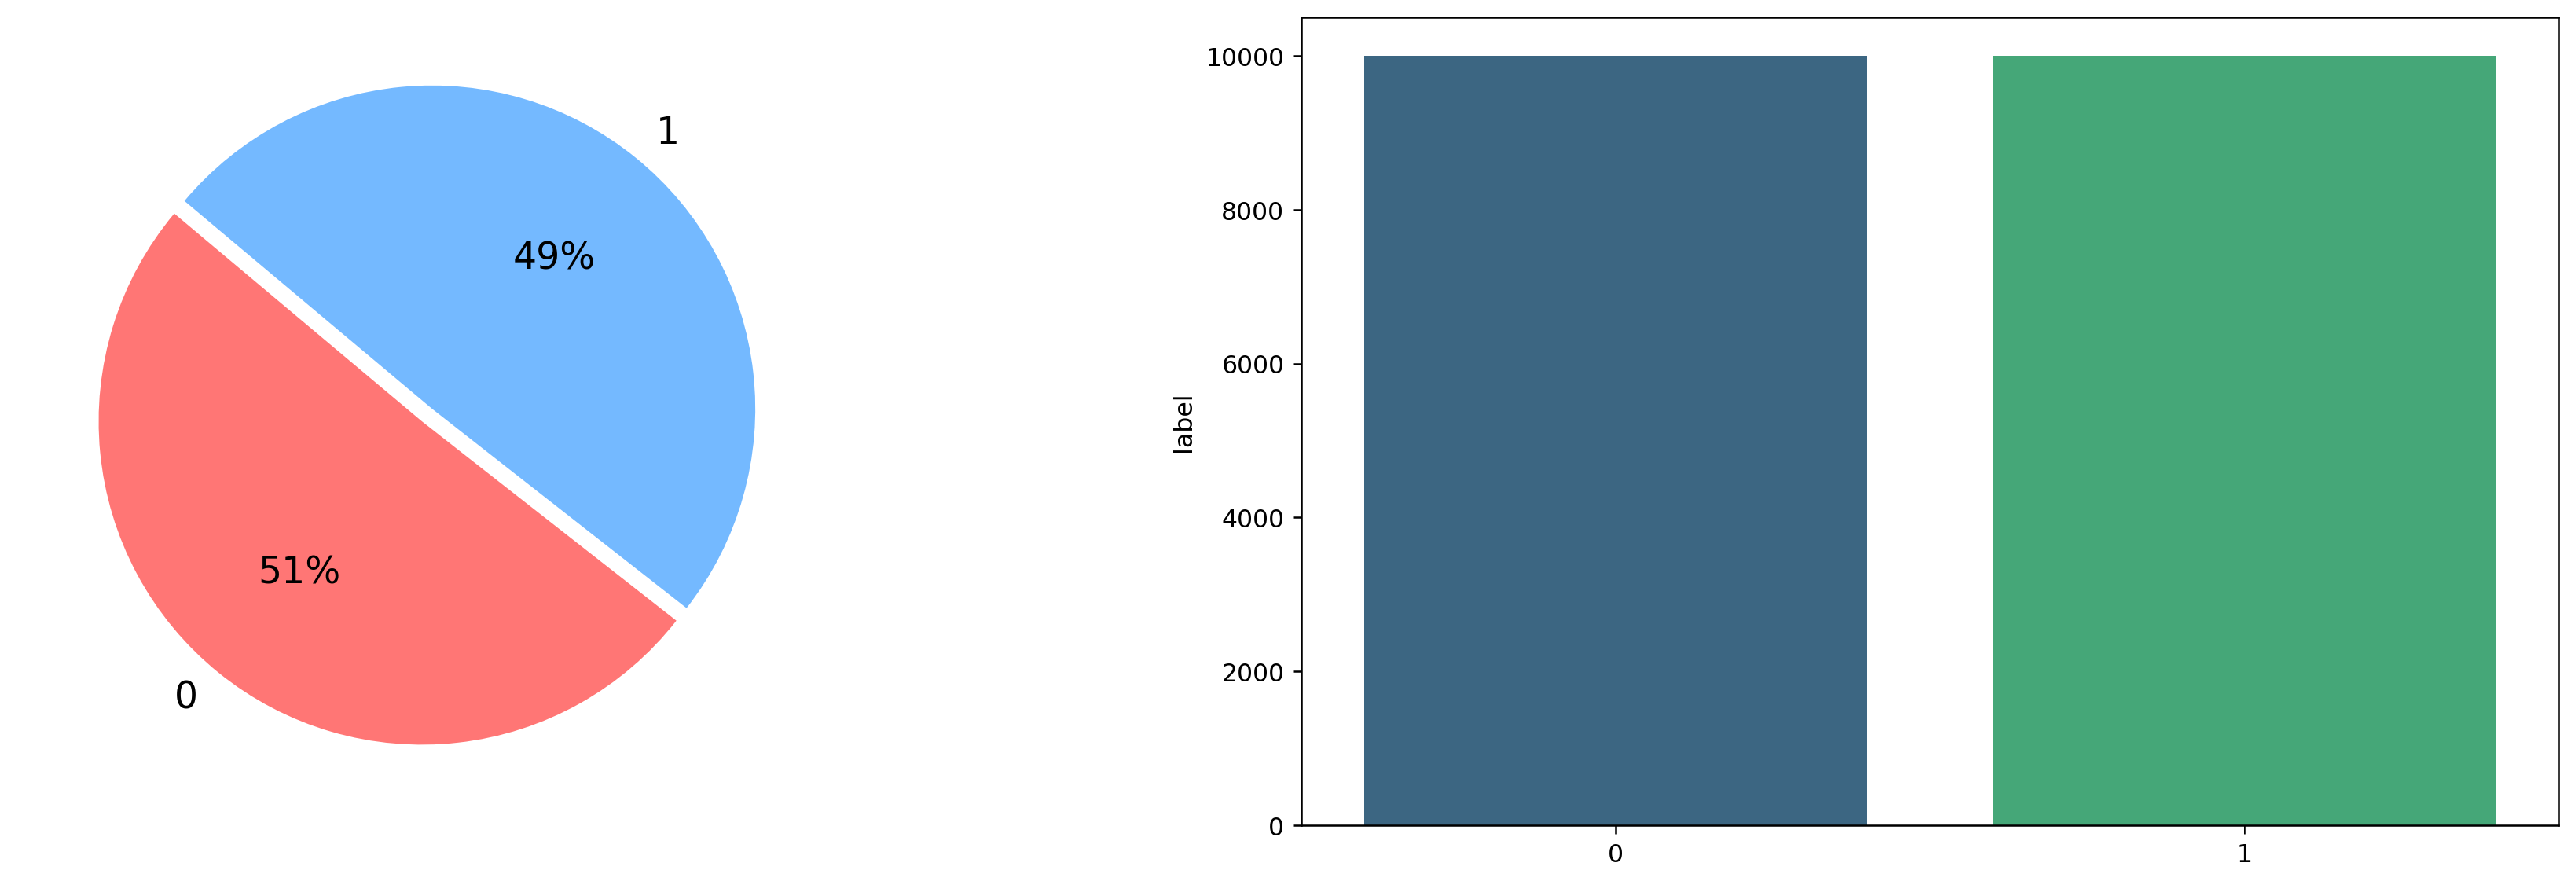

In [22]:


labels = [0, 1]
sizes = [14139, 13838]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = Mental_Health_Twitter_data['label'].unique(), y = Mental_Health_Twitter_data['label'].value_counts(), palette= 'viridis')

plt.show()

#### Creating new columns 'Total Words' and 'Total Chars'

In [23]:

Mental_Health_Twitter_data['Total Words'] = Mental_Health_Twitter_data['post_text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

Mental_Health_Twitter_data['Total Chars'] = Mental_Health_Twitter_data["post_text"].apply(count_total_words)

In [24]:
Mental_Health_Twitter_data.head()

,post_text,followers,friends,favourites,statuses,retweets,label,Month,Year,day,Total Words,Total Chars
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,8,2015,30,26,115
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,8,2015,30,19,77
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,8,2015,29,13,52
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,8,2015,29,23,118
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,8,2015,29,21,113


 #### Kdeplot by Total Words

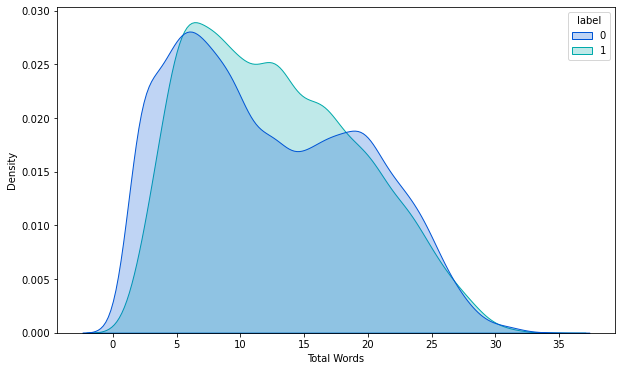

In [25]:


plt.figure(figsize = (10, 6))
sns.kdeplot(x = Mental_Health_Twitter_data['Total Words'], hue= Mental_Health_Twitter_data['label'], palette= 'winter', shade = True)
plt.show()

 ### Kdeplot by Total Chars

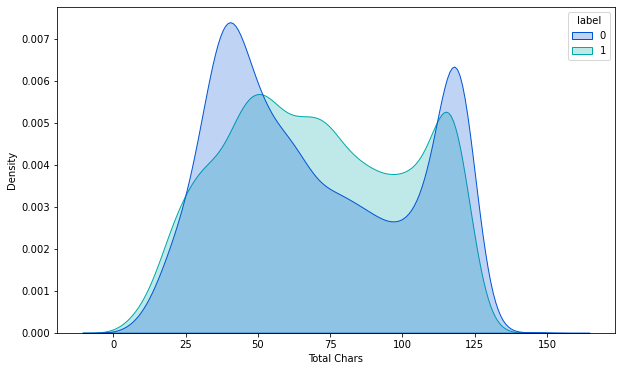

In [26]:
 

plt.figure(figsize = (10, 6))
sns.kdeplot(x = Mental_Health_Twitter_data['Total Chars'], hue= Mental_Health_Twitter_data['label'], palette= 'winter', shade = True)
plt.show()

 #### Text preprocessing

#### 1) Lowercasing

In [27]:


def convert_lowercase(text):
    text = text.lower()
    return text

Mental_Health_Twitter_data['post_text'] = Mental_Health_Twitter_data['post_text'].apply(convert_lowercase)

 #### 2) Removing URLs

In [28]:


import re
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

Mental_Health_Twitter_data['post_text'] = Mental_Health_Twitter_data['post_text'].apply(remove_url)

 #### 3) Removing Punctuations

In [29]:

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

Mental_Health_Twitter_data['post_text'] = Mental_Health_Twitter_data['post_text'].apply(remove_punc)

 #### 4) Removing stopwords

In [30]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thape\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:

def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

Mental_Health_Twitter_data['post_text'] = Mental_Health_Twitter_data['post_text'].apply(remove_stopwords)

 #### 5) Stemming

In [32]:


def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

Mental_Health_Twitter_data['post_text'] = Mental_Health_Twitter_data['post_text'].apply(perform_stemming)

 #### 6) Creating new column 'Total Words After Transformation'

In [33]:
Mental_Health_Twitter_data['Total Words After Transformation'] = Mental_Health_Twitter_data['post_text'].apply(lambda x: np.log(len(x.split())))

In [34]:
Mental_Health_Twitter_data.head()

,post_text,followers,friends,favourites,statuses,retweets,label,Month,Year,day,Total Words,Total Chars,Total Words After Transformation
0,2 year sinc diagnos anxieti depress today im t...,84,211,251,837,0,1,8,2015,30,26,115,2.708050
1,sunday need break im plan spend littl time pos...,84,211,251,837,1,1,8,2015,30,19,77,2.302585
2,awak tire need sleep brain idea,84,211,251,837,0,1,8,2015,29,13,52,1.791759
3,rt sewhq retro bear make perfect gift great be...,84,211,251,837,2,1,8,2015,29,23,118,2.708050
4,’ hard say whether pack list make life easier ...,84,211,251,837,1,1,8,2015,29,21,113,2.708050


In [35]:
 #### Data Visualization

In [36]:
#### 1) Word Cloud by label '0'

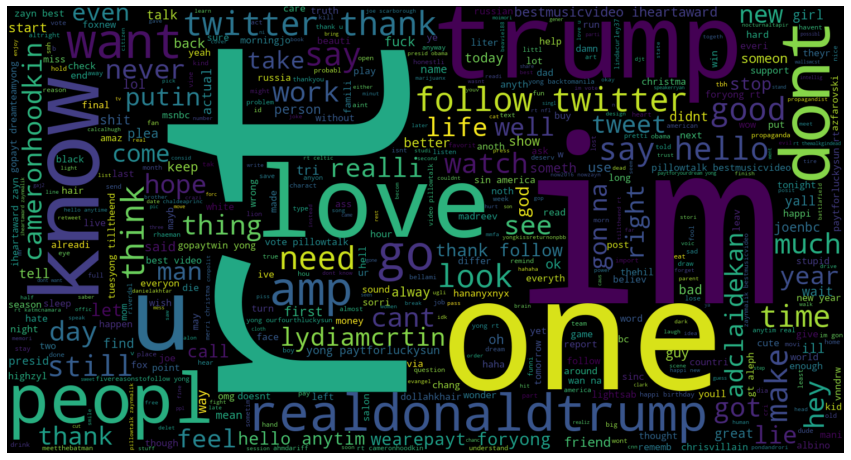

In [37]:


text = " ".join(Mental_Health_Twitter_data[Mental_Health_Twitter_data['label'] == 0]['post_text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

 #### 2) Word Cloud by label '1'

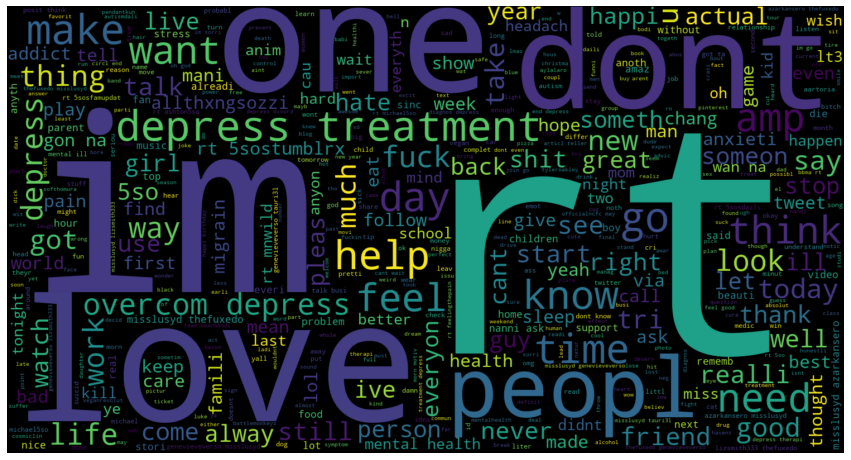

In [38]:


text = " ".join(Mental_Health_Twitter_data[Mental_Health_Twitter_data['label'] == 1]['post_text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

 #### 3) Word Frequency by label '0'

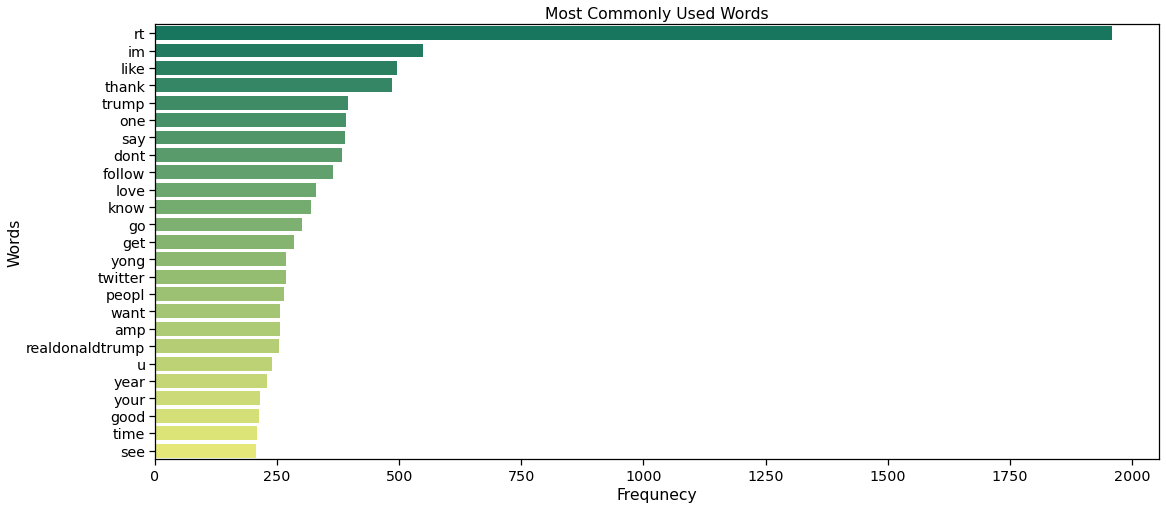

In [39]:


all_spam_words = []
for sentence in Mental_Health_Twitter_data[Mental_Health_Twitter_data['label'] == 0]['post_text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

 #### 4) Word Frequency by label '1'

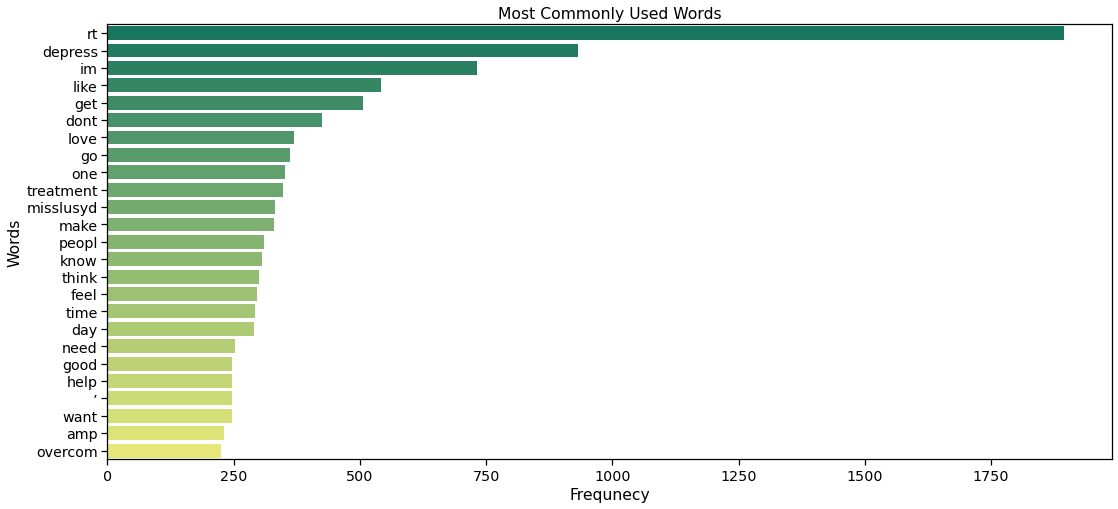

In [40]:


all_spam_words = []
for sentence in Mental_Health_Twitter_data[Mental_Health_Twitter_data['label'] == 1]['post_text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

 #### Modeling

#### 1) Naive Bayes

In [41]:
X = Mental_Health_Twitter_data["post_text"]
y = Mental_Health_Twitter_data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [42]:


tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [43]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:

def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix



In [46]:
def plot_confusion_matrix(y_true, y_pred, ax=None, cmap='Blues'):
    labels = list(set(y_true))
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    ax = sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    return ax

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [48]:

def plot_roc(y_test, y_prob, ax, plot_macro=False, plot_micro=False, cmap='summer'):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    return ax

Accuracy of the model: 0.816
Precision Score of the model: 0.808
Recall Score of the model: 0.829


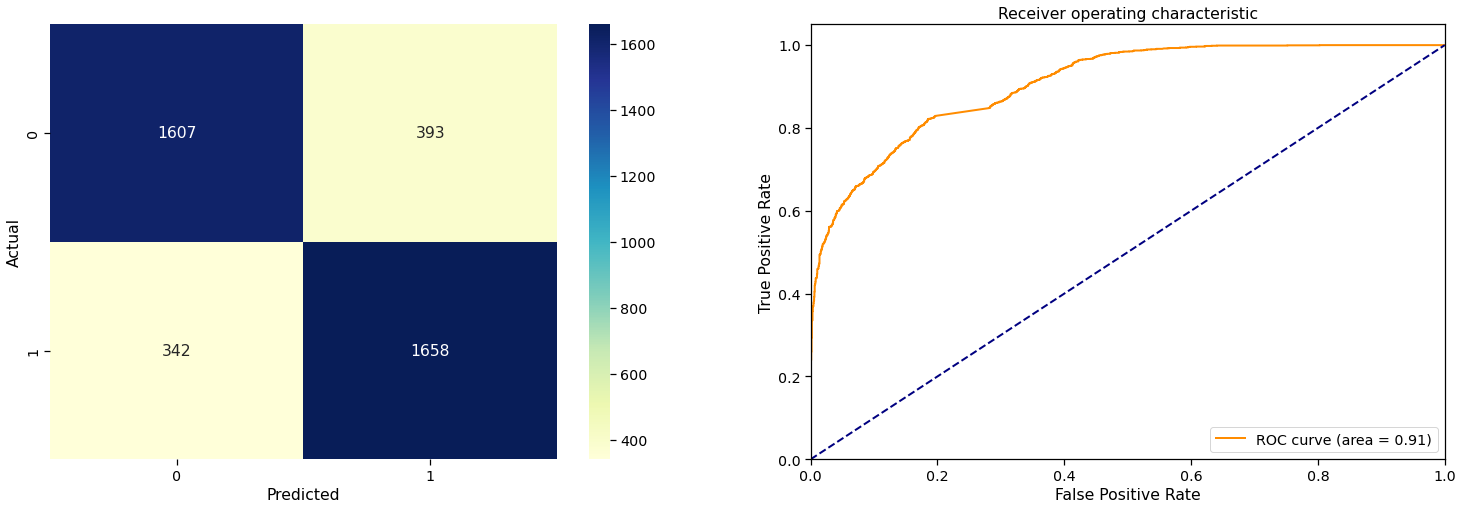

In [49]:

from sklearn.metrics import roc_curve, auc
nb = MultinomialNB()
train_model(nb)

In [50]:
def train_model(model):
    # ... the existing code ...
    # Save the trained model as a pickle file
    with open('model.pkl', 'wb') as file:
        pickle.dump(model, file)


In [111]:
from sklearn.preprocessing import LabelEncoder

# Assume that the 'column_name' column contains the string values
le = LabelEncoder()
Mental_Health_Twitter_data['post_text'] = le.fit_transform(Mental_Health_Twitter_data['post_text'])


  # Assume that the 'column_name' column contains the string values
#data = pd.get_dummies(data, columns=['column_name'])

 #### 2) Random Forest Classifier

In [53]:
#pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [54]:
import pickle


In [59]:
rf = RandomForestClassifier(n_estimators= 300)
train_model(rf)

#### 3) LSTM

In [60]:
X = Mental_Health_Twitter_data["post_text"]
y = Mental_Health_Twitter_data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [65]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [66]:
from tensorflow.keras.preprocessing.text import Tokenizer

#from keras.preprocessing.sequence import pad_sequences


ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (C:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\sequence.py)

In [67]:
max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', Mental_Health_Twitter_data['post_text'][0],'\n')
X, tokenizer = tokenize_pad_sequences(Mental_Health_Twitter_data['post_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 2 year sinc diagnos anxieti depress today im take moment reflect far ive come sinc 

After Tokenization & Padding 
 [ 106   25  192  353  222    4   51    2   48  913 3172  391   63   61
  192    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [68]:
y = Mental_Health_Twitter_data.label
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

Train:          (11200, 100) (11200,)
Validation Set: (4800, 100) (4800,)
Test Set:       (4000, 100) (4000,)


In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Bidirectional

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model

import tensorflow as tf


In [93]:
pip install pydot

In [86]:
vocab_size = 5000
embedding_size = 32
epochs=50

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

plot_model(model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [87]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=[tf.keras.metrics.Recall(),'accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 32)           160000    
                                                                 
 conv1d_5 (Conv1D)           (None, 100, 32)           3104      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 50, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [89]:
from tensorflow.keras.callbacks import EarlyStopping


In [90]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/50
175/175 [==============================] - 65s 176ms/step - loss: 0.6930 - recall: 0.6471 - accuracy: 0.5138 - val_loss: 0.6928 - val_recall: 0.3500 - val_accuracy: 0.5252
Epoch 2/50
175/175 [==============================] - 29s 163ms/step - loss: 0.6930 - recall: 0.6059 - accuracy: 0.5110 - val_loss: 0.6928 - val_recall: 0.1075 - val_accuracy: 0.5098
Epoch 3/50
175/175 [==============================] - 29s 167ms/step - loss: 0.6929 - recall: 0.4155 - accuracy: 0.5089 - val_loss: 0.6927 - val_recall: 0.4967 - val_accuracy: 0.5281
Epoch 4/50
175/175 [==============================] - 30s 169ms/step - loss: 0.6928 - recall: 0.5120 - accuracy: 0.5127 - val_loss: 0.6926 - val_recall: 0.5842 - val_accuracy: 0.5275
Epoch 5/50
175/175 [==============================] - 33s 186ms/step - loss: 0.6928 - recall: 0.5743 - accuracy: 0.5139 - val_loss: 0.6926 - val_recall: 0.5871 - val_accuracy: 0.5304
Epoch 6/50
175/175 [==============================] - 31s 175ms/step - loss: 0.6927 -

175/175 [==============================] - 36s 205ms/step - loss: 0.6901 - recall: 0.5629 - accuracy: 0.5343 - val_loss: 0.6891 - val_recall: 0.5829 - val_accuracy: 0.5450
Epoch 46/50
175/175 [==============================] - 34s 196ms/step - loss: 0.6899 - recall: 0.5721 - accuracy: 0.5305 - val_loss: 0.6890 - val_recall: 0.5867 - val_accuracy: 0.5433
Epoch 47/50
175/175 [==============================] - 34s 196ms/step - loss: 0.6898 - recall: 0.5911 - accuracy: 0.5350 - val_loss: 0.6888 - val_recall: 0.5408 - val_accuracy: 0.5485
Epoch 48/50
175/175 [==============================] - 35s 198ms/step - loss: 0.6897 - recall: 0.5584 - accuracy: 0.5381 - val_loss: 0.6887 - val_recall: 0.5900 - val_accuracy: 0.5444
Epoch 49/50
175/175 [==============================] - 34s 194ms/step - loss: 0.6896 - recall: 0.5423 - accuracy: 0.5352 - val_loss: 0.6886 - val_recall: 0.6771 - val_accuracy: 0.5431
Epoch 50/50
175/175 [==============================] - 38s 216ms/step - loss: 0.6895 - recal

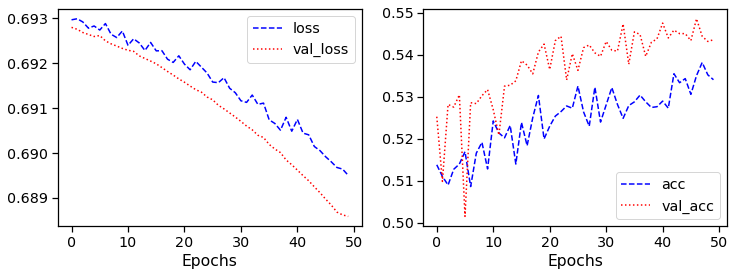

In [91]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [92]:
loss, accuracy,recall= model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))
print('Recall  : {:.4f}'.format(recall))

Accuracy  : 0.7115
Recall  : 0.5278


In [59]:
!pip install flask


^C
